# Decision Tree 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Company Data

In [49]:
company= pd.read_csv("Company_Data.csv")
company 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [50]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [51]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [52]:
lb=LabelEncoder()
company['ShelveLoc']=lb.fit_transform(company['ShelveLoc'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [53]:
array=company
X=array.iloc[:,0:6]
Y=array.iloc[:,6]

In [54]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [55]:
Y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

# Model Building 

In [56]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, random_state=40)


In [57]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

# Model Evaluation

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        13
           1       0.62      0.44      0.52        18
           2       0.65      0.84      0.73        49

    accuracy                           0.62        80
   macro avg       0.51      0.45      0.46        80
weighted avg       0.58      0.62      0.58        80



In [60]:
confusion_matrix(ytest,ypred)

array([[ 1,  0, 12],
       [ 0,  8, 10],
       [ 3,  5, 41]], dtype=int64)

In [61]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.646875
Testing Accuracy:  0.625


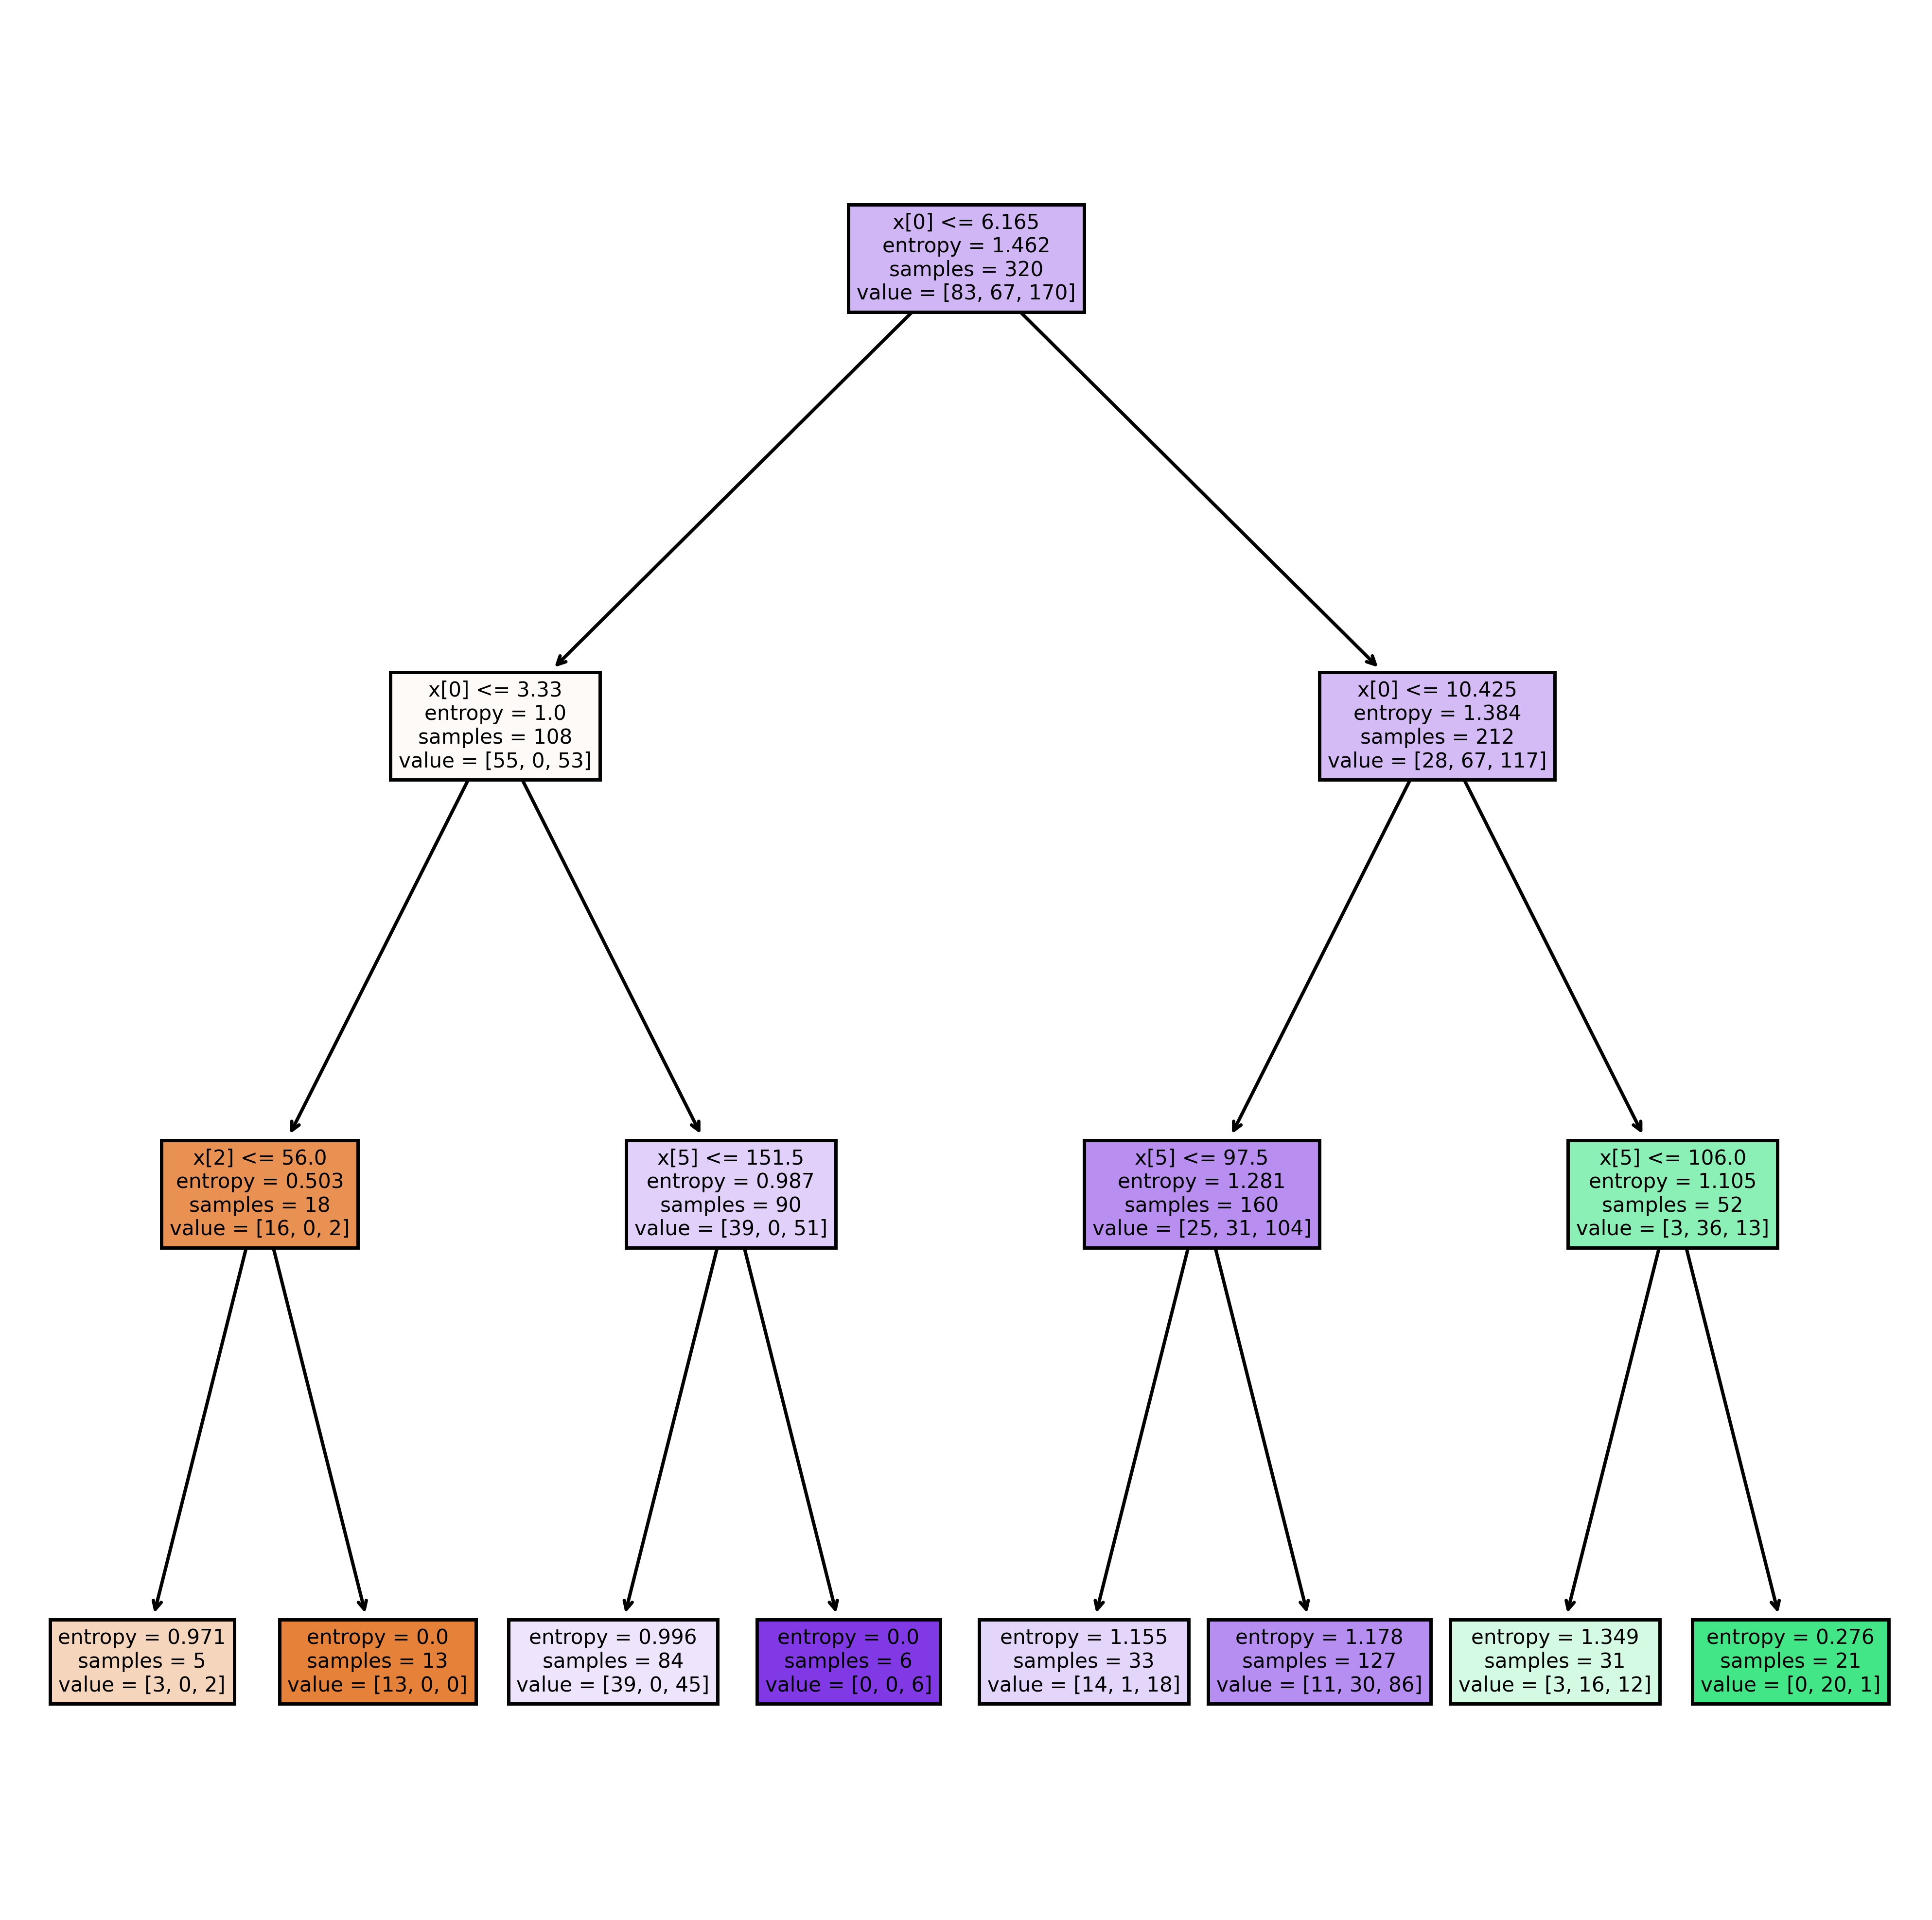

In [62]:
tree.plot_tree(dt, filled=True)
plt.show()

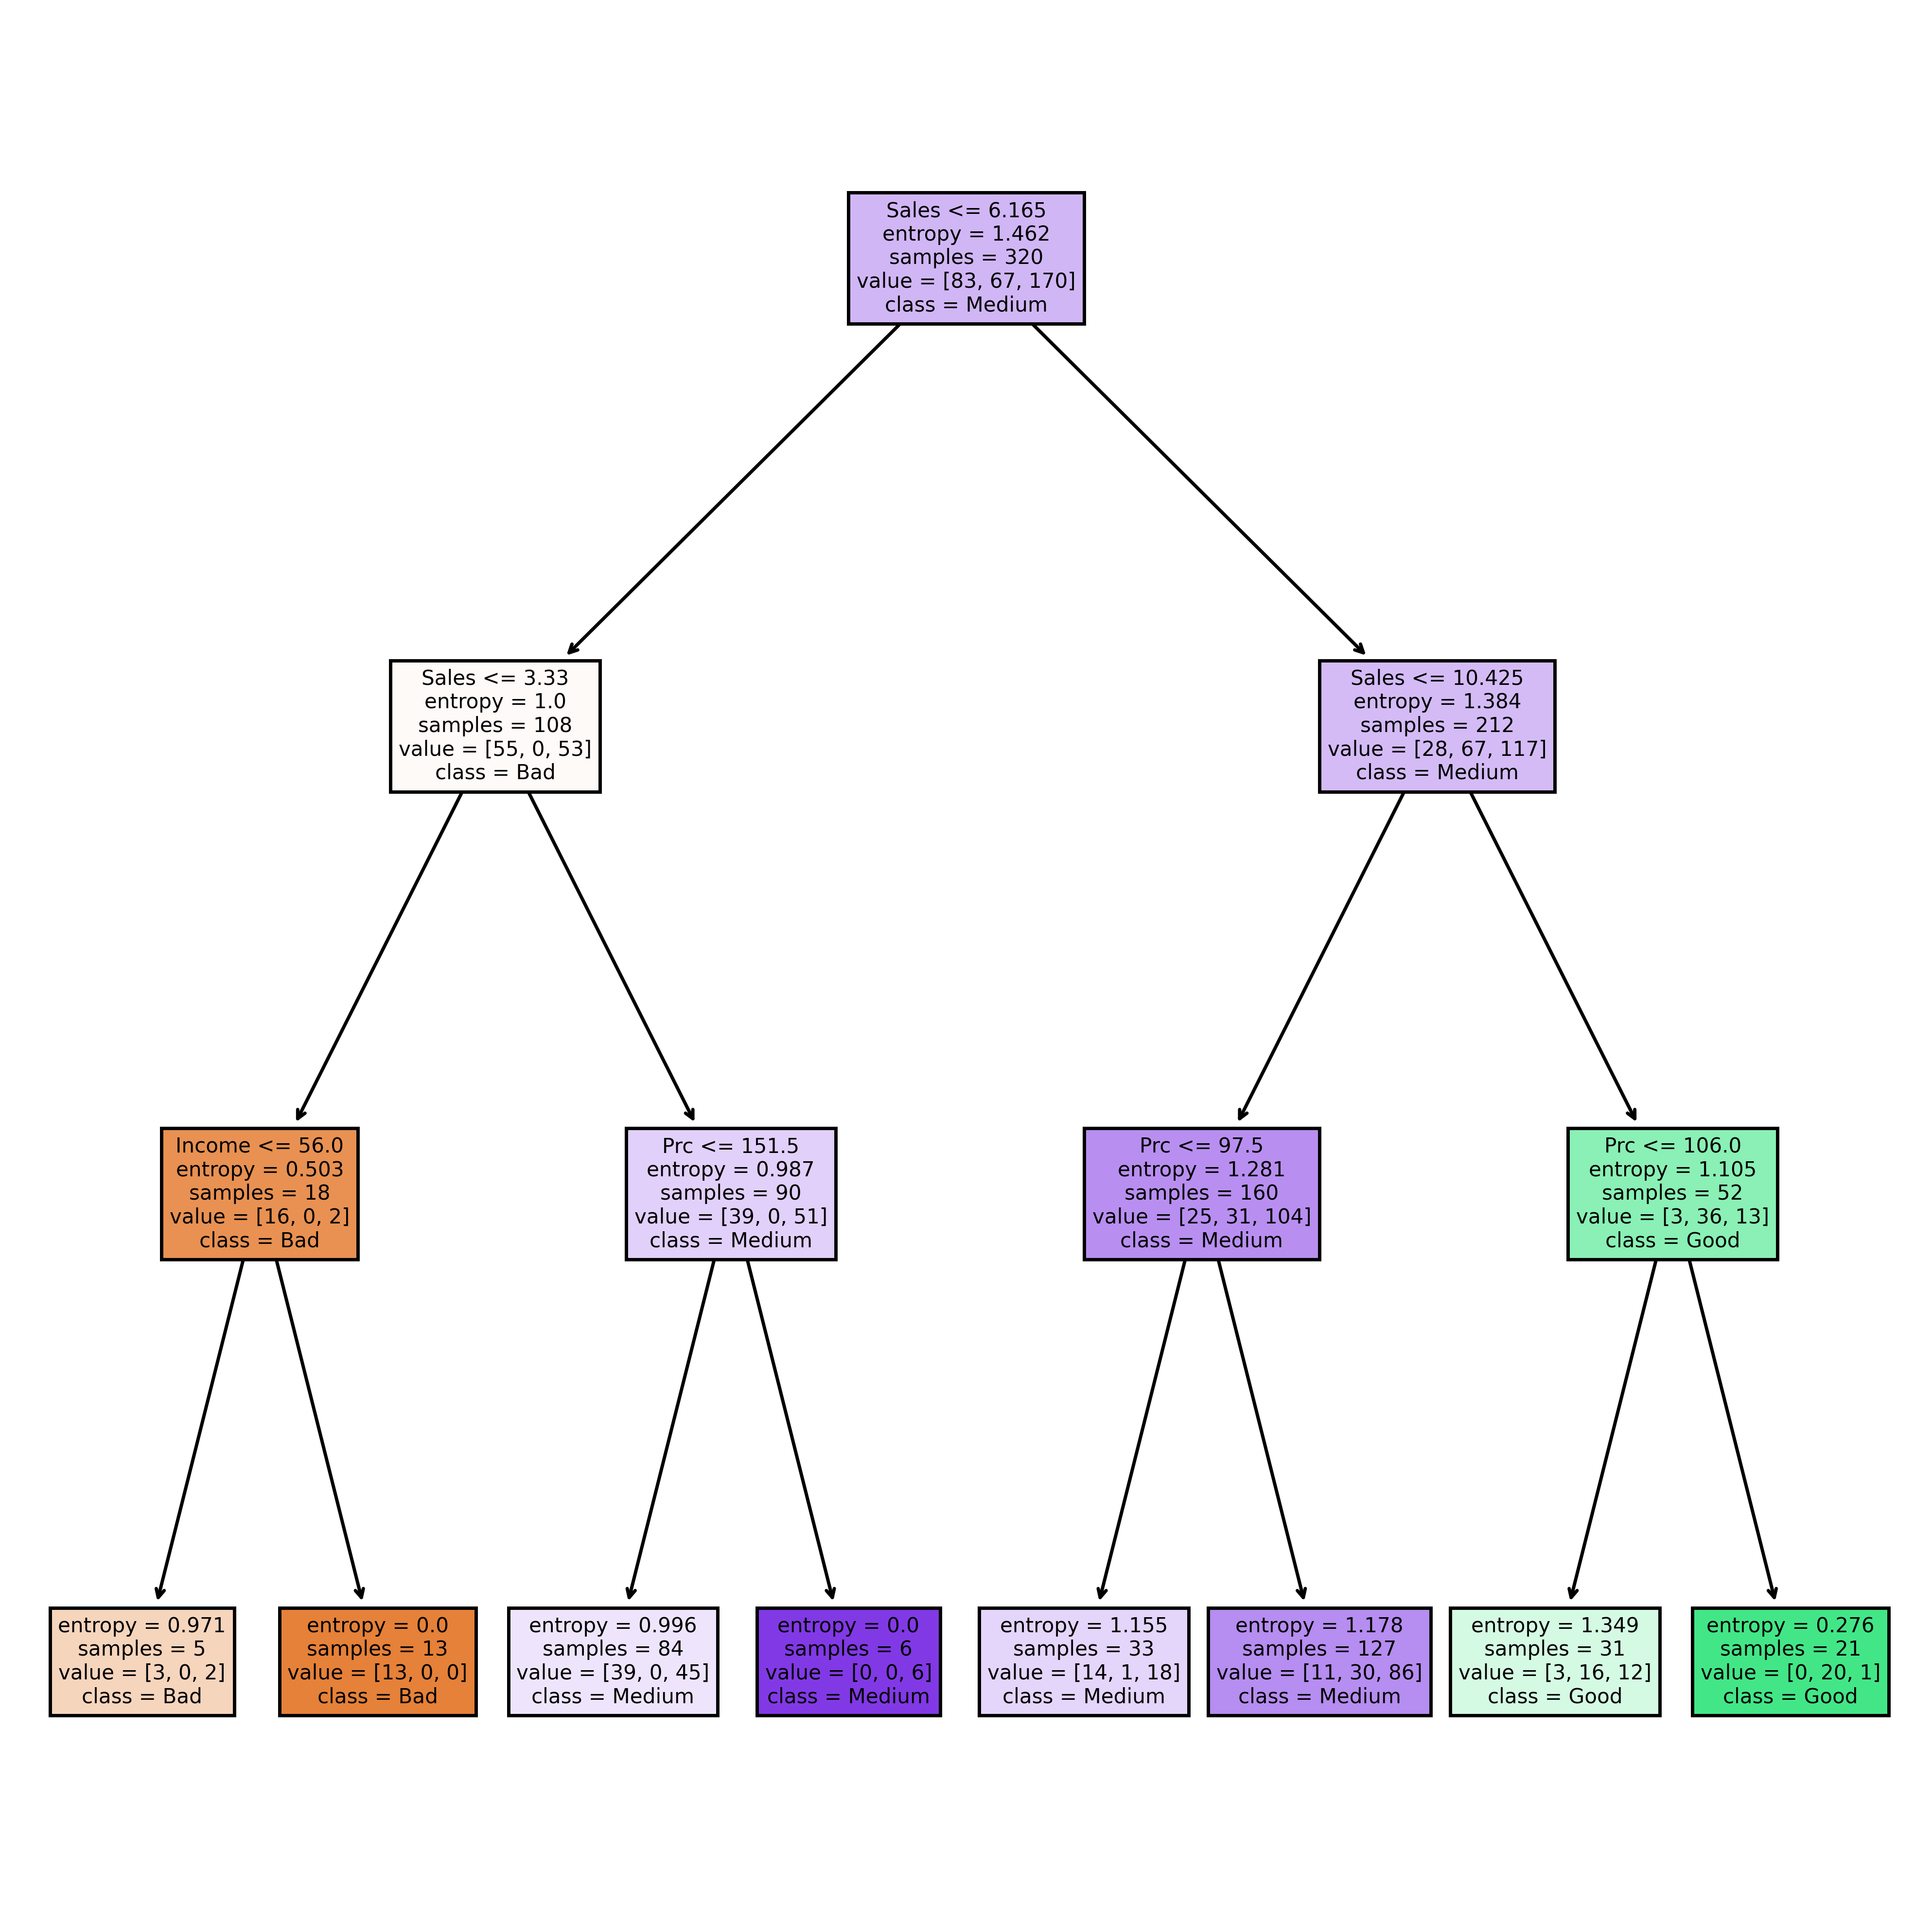

In [63]:
fn=['Sales','Comp','Income','Adv','Ppl','Prc']
cn=['Bad','Good','Medium']
fig,axes=plt.subplots(nrows=1,ncols=1)
tree.plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [64]:
pred=dt.predict(xtest)
pd.Series(pred).value_counts()

2    63
1    13
0     4
dtype: int64

In [65]:
pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [66]:
pd.crosstab(ytest,pred)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [67]:
np.mean(pred==ytest)

0.625

# Gini Impurity

In [68]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [69]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [70]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.24      0.62      0.35        13
           1       0.80      0.22      0.35        18
           2       0.60      0.51      0.55        49

    accuracy                           0.46        80
   macro avg       0.55      0.45      0.42        80
weighted avg       0.58      0.46      0.47        80



In [71]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)


(0.678125, 0.4625)

In [72]:
pd.crosstab(ytest,ypred)

col_0,0,1,2
ShelveLoc,,,
0,8,0,5
1,2,4,12
2,23,1,25


In [73]:
np.mean(ytest==ypred)

0.4625

# Fraud Check

In [74]:
FC=pd.read_csv('Fraud_check.csv')
FC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [75]:
FC['Taxable.Income'].min()

10003

In [76]:
FC['Taxable.Income'].max()

99619

In [77]:
pd.get_dummies(FC[['Undergrad','Marital.Status','Urban']])

,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
595,0,1,1,0,0,0,1
596,0,1,1,0,0,0,1
597,1,0,1,0,0,0,1
598,0,1,0,1,0,1,0


In [78]:
df=pd.get_dummies(FC,drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [79]:
df['Tax']=pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [80]:
dff=pd.get_dummies(df,drop_first=True)
dff

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [81]:
df1=dff.drop('Taxable.Income',axis=1)
df1

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [82]:
X=df1.iloc[:,0:6]
Y=df1.iloc[:,-1]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [84]:
mlx=DecisionTreeClassifier(criterion='entropy',max_depth=3)
mlx.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

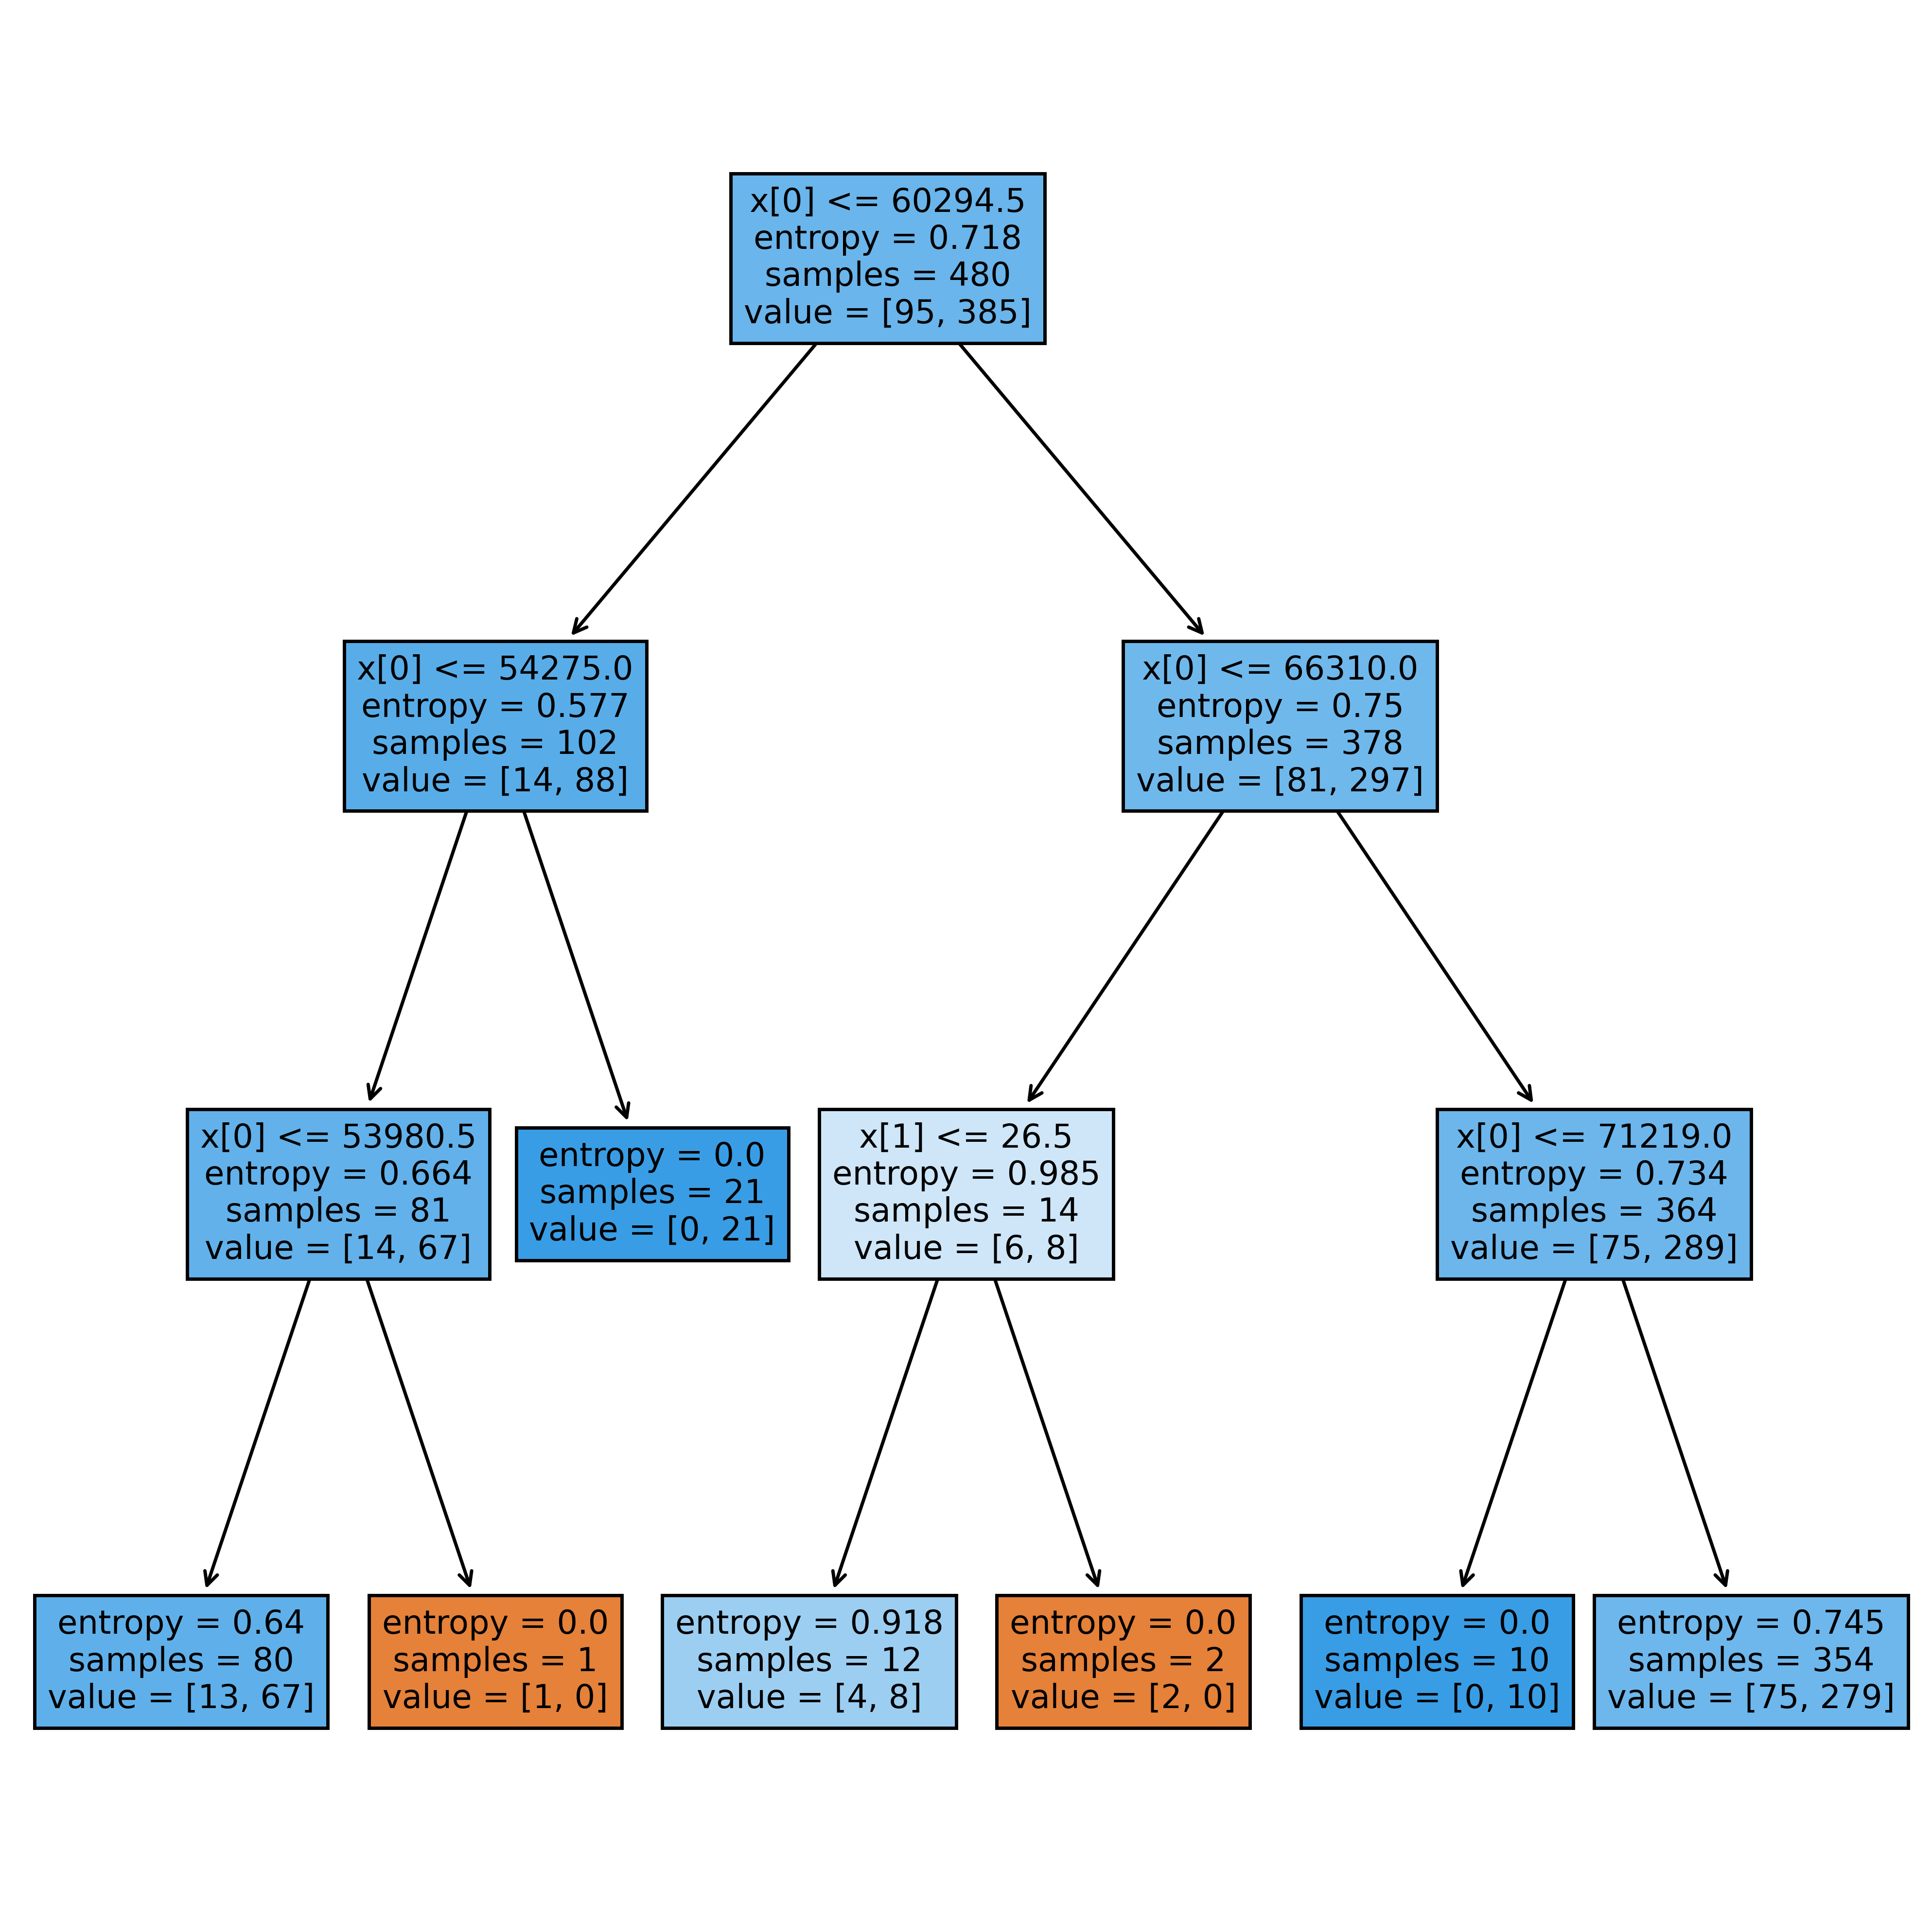

In [85]:
tree.plot_tree(mlx, filled=True);

In [86]:
t=mlx.predict(x_test)
pd.Series(t).value_counts()

1    120
dtype: int64

In [87]:
t

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [88]:
pd.crosstab(y_test,t)

col_0,1
Tax_Good,
0,29
1,91


In [89]:
np.mean(t==y_test)

0.7583333333333333

In [90]:
mlxd=DecisionTreeClassifier(criterion='gini',max_depth=3)
mlxd.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [91]:
s=mlxd.predict(x_test)
pd.Series(s).value_counts()

1    118
0      2
dtype: int64

In [92]:
s

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [93]:
pd.crosstab(y_test,s)

col_0,0,1
Tax_Good,,
0,0,29
1,2,89


In [94]:
np.mean(y_test==s)

0.7416666666666667